# Tutorial

## 1. Module run for single-pdb file

This part of the tutorial describes how to use GPCRapa for the activity analysis for single pdb files.

Before you start using this tutorial, go to param.py file in __"Notebooks"__ folder and change the parameter 
__path_to_GPCRapa__ to your full system path for this repository. br Tis tutorial uses example files located in __"Files/examples/"__ directory of this repository.

In [1]:
import os,sys
import pandas as pd
import numpy as np
import joblib


#import GPCRapa modules
import param as pr #parameters file
import mapping_and_seq_mod as ms #module used for deriving sequence from pdb file 
                                    #and making mapping for gpcrdb numeration 
import feature_calc_mod as fc #module that is used for feature calculation for pdb file
import apply_model_mod as aplm #module that is used to apply trained model(inference)

To use GPCRapa for single pdb file analysis, you need to set the following parameters:
    <ul>
    <li> __pdb_id__ - this is an identifier, which will be used in feature calculation, better to provide it as a single string object withou special characters (like bracets, marcs, etc)</li>
    <li> __PDBFile__ - this is a full system path to pdb file that you want to analyze</li>
    <li> __dir_path__ - path to save sequence from pdb file</li>
    <li> __out_path__ - path to save mapping dataframe</li>
    </ul> 
    
    
    
    
    
    

In [2]:
#user input
pdb_id = "tttesttt"
PDBFile = os.path.join(pr.path_to_GPCRapa,"Files/examples/Single_pdbs/2YDV_frame_22_act.pdb")
dir_path = os.path.join(pr.path_to_GPCRapa,"test/")
out_path = os.path.join(pr.path_to_GPCRapa,"test/")

### Step 1.1: Create mapping

To map the sequence from pdb file to GPCRdb numeration, you need to create mapping file. It can be done using br __GPCRdb_mapping_for_sequence__ function from mapping_and_seq_mod. The detailed parameters description of this br function can be found in mapping_and_seq_mod.py file. Most of the function parameters are imported from the __params.py__ file. The ones, that should be stated by you, are __pdb_id__, __PDBFile__, __dir_path__, __out_path__.

In [3]:
map_df = ms.GPCRdb_mapping_for_sequence(pdb_id, PDBFile, pr.path_to_gpcrdb_files, dir_path, out_path,
                                pr.new_seq_aligned_to_GPCRdb_seq_database, pr.canonical_residues_dict,
                                pr.gpcrdb_alignment, pr.gpcrdb_numeration, pr.his_types, pr.d)

nadd = 1
rescale = 1
dndpre (aa) Version 7.505
alg=X, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

rescale = 1
All-to-all alignment.


/home/ilya/work/Projects/gpcr-3D-annotation/test/tttesttt_mapping.csv


  288 / 289

##### writing hat3
pairlocalalign (aa) Version 7.505
alg=Y, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

nadd = 1
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
norg = 289
njobc = 290
Loading 'hat3' ... 
done.
rescale = 1
Loading 'hat2n' (aligned sequences - new sequences) ... done.
Loading 'hat2i' (aligned sequences) ... done.
c

Combining ..
   done.                      

   done.                      

addsingle (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


To keep the alignment length, 18 letters were DELETED.
The deleted letters are shown in the (filename).map file.

Strategy:
 Multi-INS-full (Not tested.)
 ?

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previ

__ms.GPCRdb_mapping_for_sequence__ prints path to the created mapping file.

### Step 1.2: Calculate features

To calculate features you need to use __calc_dist_feature_modif_no_c_id__ function from __feature_calc_mod__. br The detailed parameters description of this br function can be found in __feature_calc_mod.py__ file. Most of the function parameters are imported from the __params.py__ file. The ones, that should be stated by you, are __pdb_id__, __PDBFile__ and __map_df__, which is the pd.DataFrame() with mapping you've got from the previous step.

In [4]:
res_df = fc.calc_dist_feature_modif_no_c_id(PDBFile, map_df, pdb_id, pr.one_mod_df,
                                pr.bi_mod_df, pr.d, pr.res_contact_list, pr.one_mod_feat, 
                                pr.his_types)

In [5]:
res_df

1x49:7x50 1x53:7x53 1x53:7x54 2x37:2x40 2x42:4x45  \
tttesttt_2YDV_frame_22_act  8.567337  9.330302  5.358584  4.258223  6.857065   

                           2x43:7x53 2x45:4x50 2x46:2x50 2x50:3x39 2x50:7x49  \
tttesttt_2YDV_frame_22_act  6.629338  7.643413  5.976797  4.744551  9.238249   

                            ... 6x40:7x49 6x44:6x48 6x44:7x45 6x48:7x45  \
tttesttt_2YDV_frame_22_act  ...   5.18416  5.377464  6.945662  5.861308   

                           7x45:7x49 7x50:7x55 7x52:7x53 7x53:8x50 7x54:8x50  \
tttesttt_2YDV_frame_22_act  5.611148  11.88242  7.758261  7.727686  4.361492   

                           7x54:8x51  
tttesttt_2YDV_frame_22_act  8.644649  

[1 rows x 38 columns]

The output of __calc_dist_feature_modif__ function is the pd.DataFrame() with feature values in each column.

### Step 1.3: Applying the model

To apply the model you need to you need to use __model_apply__ function from __apply_model_mod__. This function has two parameters - __res_df__, which is the features dataframe, created on the previous step, and __model__ in joblib format.

In [6]:
aplm.model_apply(res_df, pr.model)

array([[0.32, 0.68]])

This function returns the array with two values: __first__ is the probability that structure is __inactive__, __second__ is the probability that structure is __active__.

## 2. Module run for trajectory frames

This part of the tutorial describes how to use GPCRapa for the activity analysis of molecular dynamics (MD) trajectories.

Before using GPCRapa you need to extract frames from the trajectory in __pdb format__ in a __separate directory__. It is __mandatory__ that names of the extracted framers should be in "frame_(number).pdb" format.

In [7]:
import os,sys
import pandas as pd
import numpy as np
import joblib


#import modules
import feature_calc_trj_mod as fctrj # #calculates features for trajectory's frames
import trajectory_array_mod as trarr #calculates model scores for trajectory's frames in array format
import df_for_trj_mod as dfftrj #calculates the model scores for trajectory's frames in pd.DataFrame() format
import res_viz_mod as rv #visualizes the score through all the trajectory 

To use GPCRapa for single pdb file analysis, you need to set the following parameters:
    <ul>
    <li> __pdb_id__ - this is an identifier, which will be used in feature calculation, better to provide it as a single string object withou special characters (like bracets, marcs, etc)</li>
    <li> __frames_dir_path__ - this is a full system path to folder with extracted frames from MD trajectory</li>
    <li> __dir_path__ - path to save sequence from pdb file</li>
    <li> __out_path__ - path to save mapping dataframe</li>
    </ul> 

In [8]:
#user input
pdb_id = "tt_test_tt"
frames_dir_path = os.path.join(pr.path_to_GPCRapa, "Files/examples/Trajectories/35_10386_apoform_3REY/")
dir_path = os.path.join(pr.path_to_GPCRapa,"test/")
out_path = os.path.join(pr.path_to_GPCRapa,"test/")

### Step 2.1: Create mapping

To create __mapping for trajectory frames__ you need to provide one of the extracted trajectory's __frames__ as an input __PDBFile__ for __GPCRdb_mapping_for_sequence__ function from __mapping_and_seq_mod__. For furter explanaion, see step __1.1 of 1. Module run for single-pdb file__.

In [9]:
PDBFile = os.path.join(pr.path_to_GPCRapa, "Files/examples/Trajectories/35_10386_apoform_3REY/protein_0.pdb")

In [10]:
map_df = ms.GPCRdb_mapping_for_sequence(pdb_id, PDBFile, pr.path_to_gpcrdb_files, dir_path, out_path,
                                pr.new_seq_aligned_to_GPCRdb_seq_database, pr.canonical_residues_dict,
                                pr.gpcrdb_alignment, pr.gpcrdb_numeration, pr.his_types, pr.d)

nadd = 1
rescale = 1
dndpre (aa) Version 7.505
alg=X, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

rescale = 1
All-to-all alignment.


/home/ilya/work/Projects/gpcr-3D-annotation/test/tt_test_tt_mapping.csv


  288 / 289

##### writing hat3
pairlocalalign (aa) Version 7.505
alg=Y, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

nadd = 1
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
norg = 289
njobc = 290
Loading 'hat3' ... 
done.
rescale = 1
Loading 'hat2n' (aligned sequences - new sequences) ... done.
Loading 'hat2i' (aligned sequences) ... done.
c

Combining ..
   done.                      

   done.                      

addsingle (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


To keep the alignment length, 16 letters were DELETED.
The deleted letters are shown in the (filename).map file.

Strategy:
 Multi-INS-full (Not tested.)
 ?

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'mafft --help', 'mafft --man' and the mafft page.

The default gap scoring scheme has been changed in version 7.110 (2013 Oct).
It tends to insert more gaps into gap-rich regions than previ

### Step 2.2: Calculate features

To calculate features for the trajectory frames you need to use __main_feat_traj__ function from __feature_calc_trj_mod__. The detailed parameters description of this function can be found in __feature_calc_trj_mod.py__ file. Most of the function parameters are imported from the __params.py__ file. The ones, that should be stated by you, are __pdb_id__, __frames_dir_path__, __dir_path__ and __out_path__. This function __does not need calculated mapping__, because mapping file is calculated inside of it.

In [11]:
from importlib import reload
reload(fctrj)

<module 'feature_calc_trj_mod' from '/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_trj_mod.py'>

In [12]:
fctrj.main_feat_traj(pdb_id,
                     pr.path_to_gpcrdb_files,
                     dir_path,
                     out_path,
                     pr.gpcrdb_alignment,
                     pr.gpcrdb_numeration,
                     pr.one_mod_df,
                     pr.bi_mod_df,
                     frames_dir_path,
                     pr.inv_d,
                     pr.res_contact_list,
                     pr.one_mod_feat,
                     pr.new_seq_aligned_to_GPCRdb_seq_database,
                     pr.canonical_residues_dict,
                     pr.his_types, pr.d)

  0%|          | 0/2500 [00:00<?, ?it/s]

nadd = 1
rescale = 1
dndpre (aa) Version 7.505
alg=X, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

rescale = 1
All-to-all alignment.
  288 / 289

##### writing hat3
pairlocalalign (aa) Version 7.505
alg=Y, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

nadd = 1
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
norg = 289
njobc = 290
Loading 'hat3' ... 
done.
rescale = 1
Loading 'hat2n' (aligned sequences - new sequences) ... done.
Loading 'hat2i' (aligned sequences) ... done.
cTEP 0 / 1                    

Combining ..
   done.                      

   done.                      

addsingle (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


To keep the alignment length, 16 letters were DELETED.
The deleted letters are shown in the (filename).map file.

Strategy:
 Multi-INS-full (Not tested.)
 ?

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'maff

/home/ilya/work/Projects/gpcr-3D-annotation/test/tt_test_tt_mapping.csv


/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.957396248983397. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.09344138912703. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.26560909854388. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.17906026145138. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.894517358630434. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.183589714989573. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.479505626732625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.093757215340784. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.7605031714884. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.1425813764018. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feat

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.726186971527028. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.0611621674605. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.686398356058094. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_valu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 1x49:7x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.902053782030908. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.09064212904868. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.153131262785323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.844146657017806. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.443044479992796. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.875246805601947. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.10609000769088. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.240444904308045. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.804712977035287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.457512151338616. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.264706370493458. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.606543214171227. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.807559325414193. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.469599119813132. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.004982592107162. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.332785236289556. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.349659336304311. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.556393865921528. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.78729740013594. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.652509566703905. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.815886715692379. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.68873238271106. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.864556601535067. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.9988501160312. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.89157536702877. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.588493701264222. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.893936142807837. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.811512059214635. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.044590137765386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.05976564674083. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.03204296340735. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.087466757399135. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.682951383746591. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.68861855755378. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 12.434434007494461. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.18046122919454. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.451545962877088. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.49814685091839. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.730266425133571. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.188107789265544. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.51724506926309. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.919719930093386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.467951468113306. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.041567281442079. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.177255508734223. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.007767936733567. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.646701948236075. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.402070389397487. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.22643075697775. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.950800028145824. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.7180969283911. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.761549133977194. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.982689281899297. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.27850654610615. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.037607609477593. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.761556904197075. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.419196163041143. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.569843897069884. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.237931517446452. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.42653332075979. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.155742869662161. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.769204584785177. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.33296440251199. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.44971092901617. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.401523176431574. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.950838185700112. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.372867463885335. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.335190273400798. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.07400381636273. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.362585215974928. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.399443206618148. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.431573738465822. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.205317380410772. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.099988069999444. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.870604231741122. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.904404055754437. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.450005448081303. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.102957849530018. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.55294736461856. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.755146650629857. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.58866672906416. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.250170664843605. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.39752674446723. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.047208428813647. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.952678018696346. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.58937685424559. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.893951630059444. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.212484330554737. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.285085716907798. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.212812456078826. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.391824766227163. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.24967195842245. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.230194805047223. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.518386203496622. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.488220081670846. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.729774066516022. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.15911365567327. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.972009248440628. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.522863952122066. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.188470514951607. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.013939808331298. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.572960232297397. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.83640724721345. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.200689140704302. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.16499638822874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.41174218697072. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.272445607920456. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.57955434427374. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.20694248942923. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.785319924030333. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.383836364417085. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.859256485958184. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.718867860678326. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.862538484525626. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.7961976435212. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.48896333724517. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.403669725104614. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x46:2x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.33400483309346. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.60256175880336. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.473374126955015. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.354951202843273. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.89152007437953. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.301742063979315. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.233667056010043. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.43628126942537. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.875637681328612. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.988999777072753. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.760561378383223. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.33913312938105. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.415920256877687. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.518240891476335. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.477273781493068. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x46:2x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.599005156843777. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.059007291364402. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.459308208164174. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.07910122614881. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.345670974110135. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.8983942856686. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.11182921276737. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.37496808974488. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.531399595971475. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.40743349326565. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.403741772230312. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.889400008901948. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.020402158152624. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.639762783733904. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.285322379565933. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.90218062454239. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.474889961937805. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.590187937424055. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.278279417139323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.835347948451883. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.068366032074774. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.062638443258695. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.065208959643357. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.654866158939647. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.273028301016165. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.125303934090542. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.412667241193255. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.5505754647087. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.472608678073634. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.540336295436358. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.011245240289508. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.19880490451674. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.898420058399427. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.827754366625626. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.289248488684223. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.940506579490197. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.167681995094995. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.871510809205535. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.800235903136493. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.464715910834446. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.059873347582023. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.847408178801222. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.474619129303758. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.707715185739715. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.668926243989077. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.821900859648796. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.598171563471677. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.21556509042322. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.42756787259707. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.9313675927104. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_valu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.22508276326367. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.28574878371937. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.741795245678636. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.249192857566683. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.120448103547762. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.009851725897413. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.111103105719057. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.47546679131906. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.46555198115827. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.12993175152183. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.515728529113822. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.604396731514562. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.696560089239568. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.60807796245061. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.264554864164353. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.558907036741743. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.036045905427706. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.036410699653292. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.444794976021473. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.113136962217613. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.814726628269618. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.00250230531621. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.674911616198575. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.229749151270166. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.070221118682134. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.533442866944636. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.461907672732583. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.87542659988169. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.678941075592505. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.674684291527974. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.042056659525727. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.512037895880454. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.102287445985365. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.867058974816151. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.37609472390081. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.55478347769142. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.09831476426265. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.302564430030547. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.43579225482638. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.81209508081735. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.036615544856303. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.769561057772606. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.436938328672255. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.069591929514576. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.37677287319654. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.609191361715922. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.80026147450924. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.60562338226459. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.051181745916654. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.089579770888625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.997089063243358. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.824284704400874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.17199434351675. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.600986970625883. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.183030654478987. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.6638602554555. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.10452895905767. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.38800018834047. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.772719323813412. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.867167794865388. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x50:3x39 feature value 9.959476007328963. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.35488500690475. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.947855309845687. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.804917892651787. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.419130671191994. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.338113964333942. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.921086096195568. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.81440302799171. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.052661584767886. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.212294807515804. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.816295502757026. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.42732566856082. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.441748742986167. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.975029957661782. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.41317751782518. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.982817275588534. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.777457628232145. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.23066726398534. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.247890251117568. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.963499860428062. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.396978243281414. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.082514731578625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.62287841684325. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.84642947040798. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.78232315997841. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.673271930189564. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.60092543596062. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.34409095105323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.79659135713795. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.707636167717524. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.999246489297366. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.212656245298305. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.895815761955127. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.57270285368732. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.728592959814716. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.524786338389488. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.063318376326528. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.344490606612116. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.281662494616448. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.029367424526736. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.59188510201956. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.286693052128307. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.012063794297546. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x50:3x39 feature value 9.922399692457857. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.631341193929199. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.454724142285936. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.713158044504134. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.503807619873193. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.440643676876945. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.585336457976734. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.720868626940955. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.147241079150195. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.758116718154186. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.32796556252946. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.764260470868116. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

1x49:7x50 1x53:7x53 1x53:7x54 2x37:2x40 2x42:4x45  \
tt_test_tt_protein_0     4.933603  5.759662  8.923623  4.082398   7.16493   
tt_test_tt_protein_1      4.68399  5.688961  9.016813  4.309113  7.418841   
tt_test_tt_protein_2     4.566563  5.903922   8.75532  4.529637  7.613655   
tt_test_tt_protein_3     4.355008  5.193773  8.875474   4.10417  7.468661   
tt_test_tt_protein_4     4.294354  5.563879  9.096986  4.506145  6.229701   
...                           ...       ...       ...       ...       ...   
tt_test_tt_protein_2495  4.860961  6.800787  6.580686  4.217028  9.324096   
tt_test_tt_protein_2496  4.692344  7.702149  6.564353   4.28227  8.548772   
tt_test_tt_protein_2497   4.29892  8.263047  6.114457  4.283682  8.051668   
tt_test_tt_protein_2498  4.488235  7.450408  5.630166  3.991144  8.648955   
tt_test_tt_protein_2499  4.743771  7.441986  7.015481   4.25595  7.358954   

                        2x43:7x53  2x45:4x50 2x46:2x50 2x50:3x39 2x50:7x49  \
tt_test_tt_protein_0      6.19733   6.326217   6.46916  6.661453   7.74247   
tt_test_tt_protein_1      5.48695   6.126921  6.463245  6.873689  7.400523   
tt_test_tt_protein_2     5.659687   6.665139  6.520199   6.78106  7.443478   
tt_test_tt_protein_3     5.864522   6.829727  6.825383  6.171952  6.374308   
tt_test_tt_protein_4      5.65919   7.700703  6.885748  6.198857  7.089475   
...                           ...        ...       ...       ...       ...   
tt_test_tt_protein_2495  4.763018   9.366918  7.624472   6.98721  7.992043   
tt_test_tt_protein_2496  4.854123  11.013957  8.098748  7.992276  7.537161   
tt_test_tt_protein_2497   5.14551  10.470039  7.405494  7.132431  6.555943   
tt_test_tt_protein_2498  4.781439  10.671989  7.566773  7.572638  7.790602   
tt_test_tt_protein_2499  4.685077  10.645137  6.571777  6.921367  7.292106   

                         ... 6x40:7x49 6x44:6x48 6x44:7x45 6x48:7x45  \
tt_test_tt_protein_0     ...  4.961013  6.319355  5.392002  5.961801   
tt_test_tt_protein_1     ...  5.002524  6.006732  5.542927  6.602192   
tt_test_tt_protein_2     ...   4.55503  5.639764  5.253538   6.37915   
tt_test_tt_protein_3     ...  5.525005   6.02244   4.73725  8.116243   
tt_test_tt_protein_4     ...  5.160623  5.922984  5.204914  7.408306   
...                      ...       ...       ...       ...       ...   
tt_test_tt_protein_2495  ...  8.053894  9.018947  8.820464  4.968678   
tt_test_tt_protein_2496  ...   8.90595  8.050253  8.125994  5.131964   
tt_test_tt_protein_2497  ...  9.228952  8.017524  8.102585  5.075002   
tt_test_tt_protein_2498  ...  8.448433  8.161236  8.550401  5.495402   
tt_test_tt_protein_2499  ...  8.801144  8.232477   8.79277  4.709059   

                        7x45:7x49  7x50:7x55 7x52:7x53 7x53:8x50 7x54:8x50  \
tt_test_tt_protein_0     6.233372  11.868454  6.766558   6.02866  7.560979   
tt_test_tt_protein_1     4.960941  11.861528  6.522597  5.174848  6.644877   
tt_test_tt_protein_2     5.094072  12.312156  6.336344  6.015963  7.213438   
tt_test_tt_protein_3     4.533305  12.183868  6.163953  5.778526  7.120548   
tt_test_tt_protein_4     4.903688  11.784809  6.260636  5.637726  6.941343   
...                           ...        ...       ...       ...       ...   
tt_test_tt_protein_2495  7.460275  11.970095  8.095736  6.059201  4.839401   
tt_test_tt_protein_2496  7.003778   12.05768  7.478368  6.091772  4.792978   
tt_test_tt_protein_2497  7.383098  12.222807  7.303578   6.81642  4.642035   
tt_test_tt_protein_2498  7.485166  11.653538   7.66833  6.253565  4.458633   
tt_test_tt_protein_2499  6.740476  12.165051  7.704242  5.599489  4.746065   

                        7x54:8x51  
tt_test_tt_protein_0     5.347889  
tt_test_tt_protein_1     5.952028  
tt_test_tt_protein_2     4.990166  
tt_test_tt_protein_3     5.241308  
tt_test_tt_protein_4     5.581645  
...                           ...  
tt_test_tt_protein_2495  7.348079  
tt_test_tt_protein_2496  7.494354  
tt_test_tt_protein_2497  7.431382  


The output of __main_feat_traj__ function is the pd.DataFrame() with feature values in each column for each frame in a row.

### Step 2.3: Apply model and vizualization

#### Step 2.3.1: Apply model and get results in array format

To apply model for the trajectory frames you need to use __main_trajectory__ function from __trajectory_array_mod__. The detailed parameters description of this function can be found in __trajectory_array_mod.py__ file. Most of the function parameters are imported from the params.py file. The ones, that should be stated by you, are __pdb_id__, __frames_dir_path__, __dir_path__ and __out_path__. This function __does not need calculated mapping and features__, because they are calculated inside of it.

In [13]:
trarr.main_trajectory(pdb_id,
                      pr.path_to_gpcrdb_files,
                      dir_path, out_path,
                      pr.gpcrdb_alignment,
                      pr.gpcrdb_numeration,
                      pr.one_mod_df,
                      pr.bi_mod_df,
                      pr.model,
                      frames_dir_path,
                      pr.inv_d,
                      pr.res_contact_list,
                      pr.one_mod_feat,
                      pr.new_seq_aligned_to_GPCRdb_seq_database,
                      pr.canonical_residues_dict,
                      pr.his_types,
                      pr.d)

  0%|          | 0/2500 [00:00<?, ?it/s]

nadd = 1
rescale = 1
dndpre (aa) Version 7.505
alg=X, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

rescale = 1
All-to-all alignment.
  288 / 289

##### writing hat3
pairlocalalign (aa) Version 7.505
alg=Y, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

nadd = 1
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
norg = 289
njobc = 290
Loading 'hat3' ... 
done.
rescale = 1
Loading 'hat2n' (aligned sequences - new sequences) ... done.
Loading 'hat2i' (aligned sequences) ... done.
cTEP 0 / 1                    

Combining ..
   done.                      

   done.                      

addsingle (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


To keep the alignment length, 16 letters were DELETED.
The deleted letters are shown in the (filename).map file.

Strategy:
 Multi-INS-full (Not tested.)
 ?

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'maff

/home/ilya/work/Projects/gpcr-3D-annotation/test/tt_test_tt_mapping.csv


/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.09344138912703. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.26560909854388. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.353653169882282. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.17906026145138. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.894517358630434. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.183589714989573. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.479505626732625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.7605031714884. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(res

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.216630812213058. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.508337315315895. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.962238132312287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.11930885428586. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.000645375691082. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.36002904867032. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.81604338281102. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.927773753012616. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.557033193733158. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.59992912932848. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.52554436159718. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.28452957239046. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.485956452104581. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.81895195892755. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.251591847272364. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.265831473228786. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.360423749361548. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.62890621784552. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.756161555741155. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.09280148857368. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.067012855985347. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.90594793098281. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.991186646633874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.403152676097521. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.517347937365162. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.504422710839759. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.815886715692379. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.68873238271106. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.864556601535067. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.544405076307783. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.66875337382719. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.9988501160312. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_valu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.044590137765386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.763405867753697. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.17379900423492. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.61938103488874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.05976564674083. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.175230526897668. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.944956540890196. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.682951383746591. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.01360466576774. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.18046122919454. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.451545962877088. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.92318642891794. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.48785200035725. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.121043501345229. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.946663175996997. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.167252719425306. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.832575969392185. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.498040858529125. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.658596222211973. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.663915645647283. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.156128117838762. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.677262741754955. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.771338090826518. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.475643218187006. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.50866618151198. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.61186048968705. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.137320359337142. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.246126699168517. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.81550094326014. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.745870820100883. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.28541733893621. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.7731507132614. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.996974414995853. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.848876137342835. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.171667474120536. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.335648868881737. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.50589653552944. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.802913087184745. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.44230051228437. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.94629654128694. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.87885460212873. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.379780467626588. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.21587280582586. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.841810474138665. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.07400381636273. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.005724431517084. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.15150694864443. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.431573738465822. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.205317380410772. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.81562123511641. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.870604231741122. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.904404055754437. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.270719569818482. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.450005448081303. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.102957849530018. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.58866672906416. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.970594546518015. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.25427582535921. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.047208428813647. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.565337732789093. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.893951630059444. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.02453489779593. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.989130537258067. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.285085716907798. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.212812456078826. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.06484569620767. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.255203473522773. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 12.864179404851445. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.729774066516022. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.979814245639254. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.931157230974527. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.972009248440628. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.522863952122066. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.787648986795. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.013939808331298. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.572960232297397. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.23009869949205. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.16499638822874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.853063865347124. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.60475915291455. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.45206812574212. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.56770385645425. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.929100463718527. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.2390059990554. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.362939079347324. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.546840175170566. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.103122094965208. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.04122525118601. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.912367197554133. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.740111401550898. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.979472472229805. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.76567502321521. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.388047887982362. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.14242978075672. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.432804811022475. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.842997968831913. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.466127252392134. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.233667056010043. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.45119899074386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.443837740850388. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.988999777072753. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.13060628010291. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.133021447674622. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.72338375016339. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.179002413774697. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.95400887743724. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.582988172979054. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.669147759853452. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.355086156018764. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.732599914658728. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.685529079698078. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.25074403944743. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.69873879464042. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.248007472960897. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.840997613423593. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.206675285437903. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.70902635843207. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.38583283943847. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.87541093081935. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 11.497152078748677. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.68844584154536. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.380468861289796. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.877759429882193. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.292199540450184. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.88530963034487. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.834247202671495. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.486363810729355. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.701401395837173. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.664584277339017. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.69043809278611. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.24287338272714. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.583727172833008. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.827397831017798. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.805641118359024. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.889759260540895. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.239543810540034. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.07159209159324. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.941281302546937. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.73552673404033. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.75818799054198. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.380841549318742. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.970521827009996. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.28058433589958. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.98770818497801. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.97293915423838. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.353063873079027. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.0914218555305. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.800235903136493. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.464715910834446. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.847408178801222. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.474619129303758. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.707715185739715. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.799023901979787. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 3x51:5x57 feature value 7.476118163434625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.947742790979344. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.42756787259707. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.9313675927104. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.860457350393297. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.93789814522183. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.51429478074053. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, fea

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.009851725897413. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.882326332463553. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.21971781290627. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.991302617172323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.111103105719057. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.38024925078193. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.79615127348136. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.982060022635103. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.677488850116326. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.72439326713851. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.35370579710054. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.319851334920717. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.20495797083157. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.013736622821227. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.82430530936037. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.905099406169608. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.814726628269618. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.00250230531621. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.674911616198575. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.004937333855477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.701386475838408. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.229749151270166. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.593161631726616. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.38286255411167. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.911684379566. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_valu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.391701013919413. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.965187357903766. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.220778516758095. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.29257731357655. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.280853906503827. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.186265310732107. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.734583081562654. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.7758220578246. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.42621275378477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_valu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.839569770570323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.247508619476735. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.814084745029426. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.40060234814313. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.478031884021306. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.35549248854026. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.056253110727123. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.346171451284235. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.172775804783367. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.48027265197285. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.766721786409452. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.358271734371044. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.01806691841997. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.935056465686145. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.51372273031287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.210595291319942. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.729430626990233. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.900039089948407. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.894731057237458. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.39278701086343. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.039332838133795. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.369886215167078. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.462711645886415. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.271790866598582. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.897891337769384. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.82644190022645. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.338113964333942. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.921086096195568. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.81440302799171. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.422750312195145. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.911335535322676. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.052661584767886. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.792995192352997. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.37199263921856. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.392745116783587. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.936789628697992. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.441748742986167. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.61770202337452. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.155529535884188. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.197997670765886. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.409910062166013. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.087128092273367. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.988731190540417. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.516750366825914. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.31081135517786. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.928662483090308. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.900028308757122. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.953071521834355. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.22621929669077. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.380410029458297. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.216284199892005. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.34409095105323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.428531238574582. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.786923990358485. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.768218785411946. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.43516106353299. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 23.109186042573977. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.434737967631243. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.31278060854826. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.816501249490575. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.979427818219133. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.281662494616448. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.344615739642123. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.59188510201956. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.029688721179237. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.963097021409812. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.940162830774636. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.012063794297546. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x50:3x39 feature value 9.922399692457857. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.631341193929199. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.454724142285936. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.910433142215659. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.08156089118647. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.503807619873193. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.440643676876945. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.585336457976734. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.216582278535304. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.098165431175115. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.321151560543735. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.71224310385436. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.86428451441714. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

array([[0.78, 0.22],
       [0.93, 0.07],
       [0.82, 0.18],
       ...,
       [0.85, 0.15],
       [0.94, 0.06],
       [0.86, 0.14]])

The output of main_trajectory function is the __array__ with __Active probability score (APS) values__ in each column: __first__ is the probability that structure is __inactive__, __second__ is the probability that structure is __active__, for each frame in a row.

#### Step 2.3.2: Apply model and get results in pd.DataFrame() format

To apply model for the trajectory frames you need to use __trajectory_df_for_viz__ function from __df_for_trj_mod__. The detailed parameters description of this function can be found in __df_for_trj_mod.py__ file. Most of the function parameters are imported from the params.py file. The ones, that should be stated by you, are __pdb_id__, __frames_dir_path__, __dir_path__ and __out_path__. This function __does not need calculated mapping and features__, because they are calculated inside of it.

In [14]:
dfftrj.trajectory_df_for_viz(pdb_id,
                             pr.path_to_gpcrdb_files,
                             dir_path, out_path,
                             pr.gpcrdb_alignment,
                             pr.gpcrdb_numeration,
                             pr.one_mod_df, pr.bi_mod_df,
                             pr.model,
                             frames_dir_path,
                             pr.inv_d, pr.res_contact_list,
                             pr.one_mod_feat,
                             pr.new_seq_aligned_to_GPCRdb_seq_database,
                             pr.canonical_residues_dict,
                             pr.his_types, pr.d)

  0%|          | 0/2500 [00:00<?, ?it/s]

nadd = 1
rescale = 1
dndpre (aa) Version 7.505
alg=X, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

rescale = 1
All-to-all alignment.
  288 / 289

##### writing hat3
pairlocalalign (aa) Version 7.505
alg=Y, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

nadd = 1
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
norg = 289
njobc = 290
Loading 'hat3' ... 
done.
rescale = 1
Loading 'hat2n' (aligned sequences - new sequences) ... done.
Loading 'hat2i' (aligned sequences) ... done.
cTEP 0 / 1                    

Combining ..
   done.                      

   done.                      

addsingle (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


To keep the alignment length, 16 letters were DELETED.
The deleted letters are shown in the (filename).map file.

Strategy:
 Multi-INS-full (Not tested.)
 ?

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'maff

/home/ilya/work/Projects/gpcr-3D-annotation/test/tt_test_tt_mapping.csv


/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.09344138912703. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.26560909854388. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.353653169882282. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.17906026145138. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.894517358630434. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.183589714989573. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.479505626732625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.7605031714884. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(res

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.216630812213058. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.508337315315895. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.962238132312287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.000645375691082. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.36002904867032. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.784895706246107. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.557033193733158. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x48:7x45 feature value 11.14960580020657. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.46773983210306. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.31435844753435. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.414703654412037. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.59992912932848. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.02344803278893. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.33204988421658. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.486879857928821. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.123015594858682. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.670082154844394. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.386719042820488. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.654331354775247. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.981185600642775. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.875186557395843. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.159396068660378. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.510613837399436. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.240798368596153. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.392682616915504. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.182797400494668. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.815886715692379. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.68873238271106. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.864556601535067. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.9988501160312. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.89157536702877. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.588493701264222. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.893936142807837. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.811512059214635. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.044590137765386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.17379900423492. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.61938103488874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.05976564674083. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.175230526897668. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.944956540890196. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.682951383746591. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.01360466576774. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.18046122919454. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.451545962877088. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.92318642891794. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.48785200035725. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.121043501345229. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.51724506926309. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.919719930093386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.467951468113306. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.454000808425723. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.553399576204885. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.381894845433212. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.182014057730736. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.933083591450796. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.51881679333009. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.452522655090295. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.016346191008378. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.748298005389138. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.8451644509173. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.96924293620066. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.467814907230682. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.30831233813241. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.011464113762866. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.489637690723786. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.343780639802315. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.5127814495557. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.703380169414723. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.98547476484274. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 7x45:7x49. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.192331392988054. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.094024536340676. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.241977434329081. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.969989975430995. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.794287973477694. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.297217785360225. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.15150694864443. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.81562123511641. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.68390389904505. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.566842077914313. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.698882608322165. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.109721508613152. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.739222770747052. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.543566275327397. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.431148360040474. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.636305483557946. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.849510686485612. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.135954929823477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.840470748846595. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.773696394499975. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.282941646435418. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 23.05546238932405. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.662544702857222. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.59830011940397. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.60456167777134. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.969466593500396. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.89291782459851. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.95579652607578. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.88883446539835. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.357071527200045. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.76461300097171. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.191039283369133. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.23331521621433. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.375600801405742. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.120858246766126. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.755754746708547. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.190604162205357. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.192770909162586. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.113883396777094. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.77255172987996. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.21778024426332. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.099932398772882. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.546840175170566. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.320859153855697. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.81050007408239. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.862641080264709. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.170978827089. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.049081162239176. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.641190875435985. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.161024646101122. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.473665811015117. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.560810986059405. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.065901534231456. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.866682337798057. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.86137525154874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.768740185992693. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.883416146944764. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.93677645061978. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.90269565273484. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.597488785113597. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.82170072049801. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.36849048842298. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.570344985011047. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.26182431111451. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.665980237744932. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.471160045296052. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.838076619354872. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.213632124144095. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.802745477989829. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.03129065512899. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.248007472960897. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.79830608690621. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.07175964620941. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.741101370571503. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.855419675759563. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.531399595971475. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.86270291925625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.321352718864585. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.90404712812371. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.618131702493045. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.927244546185428. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.760025704013835. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.72755882276507. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.767598506392059. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.22872748478789. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.57924536633937. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.726985237462948. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.892502510280387. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.684422108668244. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.115261942784226. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.517767739477755. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.434658292845814. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.659475716241477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.97572327649182. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.185315096810466. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.18871491809074. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.85590657158715. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.812144801768172. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.06571038145488. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.90530373304122. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.067891655602633. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.37057187092338. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.316071197551427. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.255761869731273. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.117299015935654. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.414070145876988. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.03467436693088. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.99562886241673. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.565022566734505. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.658576013833787. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.95418698180218. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.635687950381595. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.110315767573226. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.091674958047406. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.956407277320462. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.14601662098596. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.012465375869564. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.581833542202194. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.190501895957254. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.294203663435898. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.96950676662983. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.725765676046375. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.982647021980934. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.427802348257828. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.251519472532937. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.561460271513827. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.853853278792936. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.98635520183055. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.570363905036913. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.375948706276155. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.87689331798618. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.83848740767776. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.045303754553814. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.698090580087058. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.83365542410623. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.953338551664014. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.286545808160934. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.646188094027952. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.93710290710106. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.494839289801543. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.677516339294225. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.70623357925797. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.570164994767403. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.615303300384497. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.195847853548123. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.54332737646251. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.031863959627756. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.34296456258137. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.486292896767832. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.094922292605819. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.38839406794331. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.562604615114495. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.917767500628. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.95274393854529. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.947083528295. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.836044468908913. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.97934927122941. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.037742665964545. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.005844967595664. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.991773751284576. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x46:2x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.429469452672205. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.74590597071368. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.819745383228998. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.9940738338715. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.083578766515576. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.73479262105068. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.513488672771924. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.480709054685665. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.814873487627082. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.97552966897959. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.23462429709147. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.51372273031287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.31770926380374. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.264288803449803. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.552832872289713. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.240791317829856. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.21237253768545. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.37553595327276. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.181293798499425. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 11.462967614507598. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.897891337769384. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.82644190022645. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.629218501365738. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.911664234943089. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.224474108392336. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.496146627149493. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.894854834868726. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.422750312195145. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.37199263921856. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.054482689589634. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.926563048397533. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.89293659006263. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.392745116783587. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.982817275588534. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.777457628232145. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.23066726398534. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.578218212562092. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.507578325290286. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.152881176498422. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.868954392278596. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.396978243281414. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.3816662560595. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.009736557628528. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.164030436111634. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.98147247795259. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.155993909927673. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.07390048464884. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.805543528567148. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.466230144130463. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.948310595429005. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x50:3x39 feature value 9.606336188252767. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.999246489297366. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.212656245298305. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.763372427461604. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.112350705016615. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.985462381464192. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 24.649522653232367. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.274913090417115. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 23.773382656774587. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 23.142672407462065. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.140511818133078. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.520062470109197. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.45966741209479. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.235148207698114. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.180592371969247. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.016848467618736. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.309045251163496. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.241593706946356. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.659860209596633. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.887713586050587. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.106146395604398. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.534281010595713. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.739316621172685. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.223889859400034. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x46:2x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.109041034161958. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.411187340881861. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.429079572032137. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.496557615742992. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

Inactive probability  Active probability  frame
0                     0.78                0.22      0
1                     0.93                0.07      1
2                     0.82                0.18      2
3                     0.83                0.17      3
4                     0.94                0.06      4
...                    ...                 ...    ...
2495                  0.85                0.15   2495
2496                  0.83                0.17   2496
2497                  0.85                0.15   2497
2498                  0.94                0.06   2498
2499                  0.86                0.14   2499

[2500 rows x 3 columns]

The output of main_trajectory function is the __pd.DataFrame()__ with __Active probability score (APS) values__ in each column: __first__ is the probability that structure is __inactive__, __second__ is the probability that structure is __active__, for each frame in a row.

#### Step 2.3.3:  APS results visualization

To visualize the APS on trajectory frames you need to use __traj_viz__ function from __res_viz_mod__. The detailed parameters description of this function can be found in __res_viz_mod.py__ file. Most of the function parameters are imported from the params.py file. The ones, that should be stated by you, are __pdb_id__, __frames_dir_path__, __dir_path__ and __out_path__. This function __does not need calculated mapping and features__, because they are calculated inside of it.

  0%|          | 0/2500 [00:00<?, ?it/s]

nadd = 1
rescale = 1
dndpre (aa) Version 7.505
alg=X, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

rescale = 1
All-to-all alignment.
  288 / 289

##### writing hat3
pairlocalalign (aa) Version 7.505
alg=Y, model=BLOSUM62, 2.00, -0.00, +0.10, noshift, amax=0.0
0 thread(s)

nadd = 1
nthread = 0
blosum 62 / kimura 200
sueff_global = 0.100000
norg = 289
njobc = 290
Loading 'hat3' ... 
done.
rescale = 1
Loading 'hat2n' (aligned sequences - new sequences) ... done.
Loading 'hat2i' (aligned sequences) ... done.
cTEP 0 / 1                    

Combining ..
   done.                      

   done.                      

addsingle (aa) Version 7.505
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


To keep the alignment length, 16 letters were DELETED.
The deleted letters are shown in the (filename).map file.

Strategy:
 Multi-INS-full (Not tested.)
 ?

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'maff

/home/ilya/work/Projects/gpcr-3D-annotation/test/tt_test_tt_mapping.csv


/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.09344138912703. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.26560909854388. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.353653169882282. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.17906026145138. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.894517358630434. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.183589714989573. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.479505626732625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.7605031714884. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(res

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".forma

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.962238132312287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.294794583779407. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.54924715680295. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.784895706246107. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.662489971514617. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.46773983210306. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.07005737599556. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.50128741769739. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.59992912932848. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.52554436159718. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.28452957239046. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.485956452104581. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.81895195892755. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.251591847272364. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.733841674910288. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.020003936728834. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.265831473228786. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.62890621784552. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.756161555741155. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.09280148857368. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.991186646633874. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.251046239277564. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.03364160217372. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.880007920811913. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.02064602558652. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.108196080661576. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.80464720710931. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.62212445738993. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.3027384543219. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.757917807058824. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.50556211475325. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.55514360895508. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.587515382324227. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.12948118949669. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.289431294537456. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.466707747659715. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.187474636842762. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.494514787897035. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.91239436146613. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.137179616719468. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.764601868536438. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.677146159624645. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.121043501345229. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.592334618615386. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.730266425133571. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.635535756764224. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.615255642545662. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.063003786522552. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.159560835481669. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.978539190711594. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.454000808425723. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.182014057730736. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.933083591450796. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.51881679333009. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.452522655090295. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.016346191008378. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.748298005389138. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.8451644509173. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.96924293620066. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.467814907230682. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.30831233813241. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.011464113762866. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.155742869662161. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.639717660270676. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.934991795904711. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.44230051228437. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.94629654128694. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.87885460212873. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.379780467626588. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.21587280582586. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.841810474138665. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.07400381636273. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x48:7x45. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.005724431517084. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.556124624392897. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.646043151838917. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.81562123511641. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.68390389904505. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.566842077914313. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.270719569818482. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.698882608322165. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.109721508613152. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.636305483557946. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.421340372318625. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.055091399618334. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.135954929823477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.840470748846595. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.559312157750277. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 23.05546238932405. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.652951582438522. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.4289177758479. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.219113426539986. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.32417977938759. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.47010769085466. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.023065398567038. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.85998700621218. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.936941088101939. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.213456532374504. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.89291782459851. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.88883446539835. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.357071527200045. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.76461300097171. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.191039283369133. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.23331521621433. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.375600801405742. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.243284600119164. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.36644268868708. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.99955034902594. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.192770909162586. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.113883396777094. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.77255172987996. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.87136994128622. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.782314563867477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.21778024426332. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.2390059990554. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.362939079347324. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.546840175170566. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.103122094965208. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.04122525118601. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.740111401550898. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.979472472229805. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.97276714680088. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.630584223151804. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.76567502321521. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.388047887982362. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.466127252392134. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.08550249162037. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.866682337798057. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.768740185992693. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.883416146944764. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 9.93677645061978. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.56376518725873. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.733658114630988. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.90269565273484. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.616888281574496. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.868703797572216. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.36849048842298. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.355086156018764. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.268867329257606. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.732599914658728. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.685529079698078. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.248007472960897. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.79830608690621. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.07175964620941. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.741101370571503. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.855419675759563. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.501461871129727. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.90165574357981. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.64899276659191. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.672944457285872. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.68844584154536. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.986101614105205. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.745499618643063. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.292199540450184. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.751946666529115. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.096871163889617. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.486363810729355. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.00068041079475. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.838648319510074. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.69043809278611. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.06924039772784. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.58943005484188. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.583727172833008. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.385505173054014. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.97891847587419. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.889759260540895. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.321385920951272. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.1648555713414. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.941281302546937. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.386016685676132. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.380841549318742. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.970521827009996. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.98770818497801. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.97293915423838. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.353063873079027. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.174328064862856. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.166920943084115. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.202332506315557. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.450605055774524. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.465357500736534. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.847408178801222. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.677450550604256. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.668926243989077. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.520716277961746. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.570510524733663. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.21556509042322. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.502707686207337. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.741795245678636. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x57:7x42. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.51028631625007. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.249192857566683. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.120448103547762. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.991302617172323. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.111103105719057. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.23443272078283. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.38024925078193. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.79615127348136. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.83862542023345. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.982060022635103. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.677488850116326. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.20613227651552. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.35370579710054. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.319851334920717. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.764848894801077. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.013736622821227. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.82430530936037. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.534620125167077. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.814726628269618. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.00250230531621. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.29547440803578. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.004937333855477. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.701386475838408. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.50630840901695. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.593161631726616. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.38286255411167. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.391701013919413. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.965187357903766. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.220778516758095. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.29257731357655. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.280853906503827. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.186265310732107. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.09234744099616. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.087683948911412. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.39218496159496. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.30584172518672. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.421270436737789. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 15.94668633362465. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.49108461742048. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.835420553730787. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.352229904883867. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.791469952673967. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.260968587017018. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.63999631586806. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.819745383228998. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.9940738338715. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.083578766515576. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.73479262105068. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.513488672771924. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.480709054685665. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.814873487627082. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.97552966897959. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.23462429709147. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.51372273031287. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.31770926380374. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.264288803449803. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.552832872289713. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.10452895905767. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(re

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.79108971503518. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 16.865507603913752. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.33584490234365. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.88343106953522. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.054460768303628. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.060770499694677. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.085591633725695. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.504109339474004. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.164732936906. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_val

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.383499241447186. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.30793611832195. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.203056851496704. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.019456691389259. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.278216932443478. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.42492260110213. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.479727693860507. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.68154517243002. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.896583150891018. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.556590523192277. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.980133292258676. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.104913188897058. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.23219548523041. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.8022999870832. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.599257568490415. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.970234726424449. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.804240428455227. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.651458727659833. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.943642530846029. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.19602702319793. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.746731483675994. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.895726731618804. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resid

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.707636167717524. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.502405516862554. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 17.786923990358485. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.557815586800196. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.144957594328226. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.940472333785253. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 19.895815761955127. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.947008877505304. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 5x55:6x41. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.453041927921031. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.083579286457375. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 9.997961421897466. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.65591767835019. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 6x44:6x48 feature value 10.402154357691968. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.957846734204. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_valu

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.7217615606305. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 18.764108090271854. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 22.670807518098744. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_va

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.016848467618736. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:221: UserWarning: Smth wrong with feature 2x50:3x39. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.309045251163496. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(r

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(residue_pair))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.12497847467674. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.064665142903438. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, featur

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.767781728368572. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.380817007581722. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.36294255534212. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_v

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 11.146856896837397. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 21.615417173926875. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 3x51:5x57. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.884050878956522. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.418217440697937. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.395767539960579. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.400277045466096. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.476791431056274. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 6x44:6x48. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:209: UserWarning: Ambiguous 2x45:4x50 feature value 10.826273449628108. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:223: UserWarning: Ambiguous 2x57:7x42 feature value 20.725299591397675. Try to check structure mapping and structure model!
  warnings.warn('Ambiguous {} feature value {}. Try to check structure mapping and structure model!'.format(residue_pair, feature_value))
/home/ilya/work/Projects/gpcr-3D-annotation/Notebooks/feature_calc_mod.py:207: UserWarning: Smth wrong with feature 2x45:4x50. Check the distance between common activation pathway residues visually!
  warnings.warn("Smth wrong with feature {}. Check the distance between common activation pathway residues visually!".format(resi

[(0.0, 1.0), (0.0, 2500.0)]

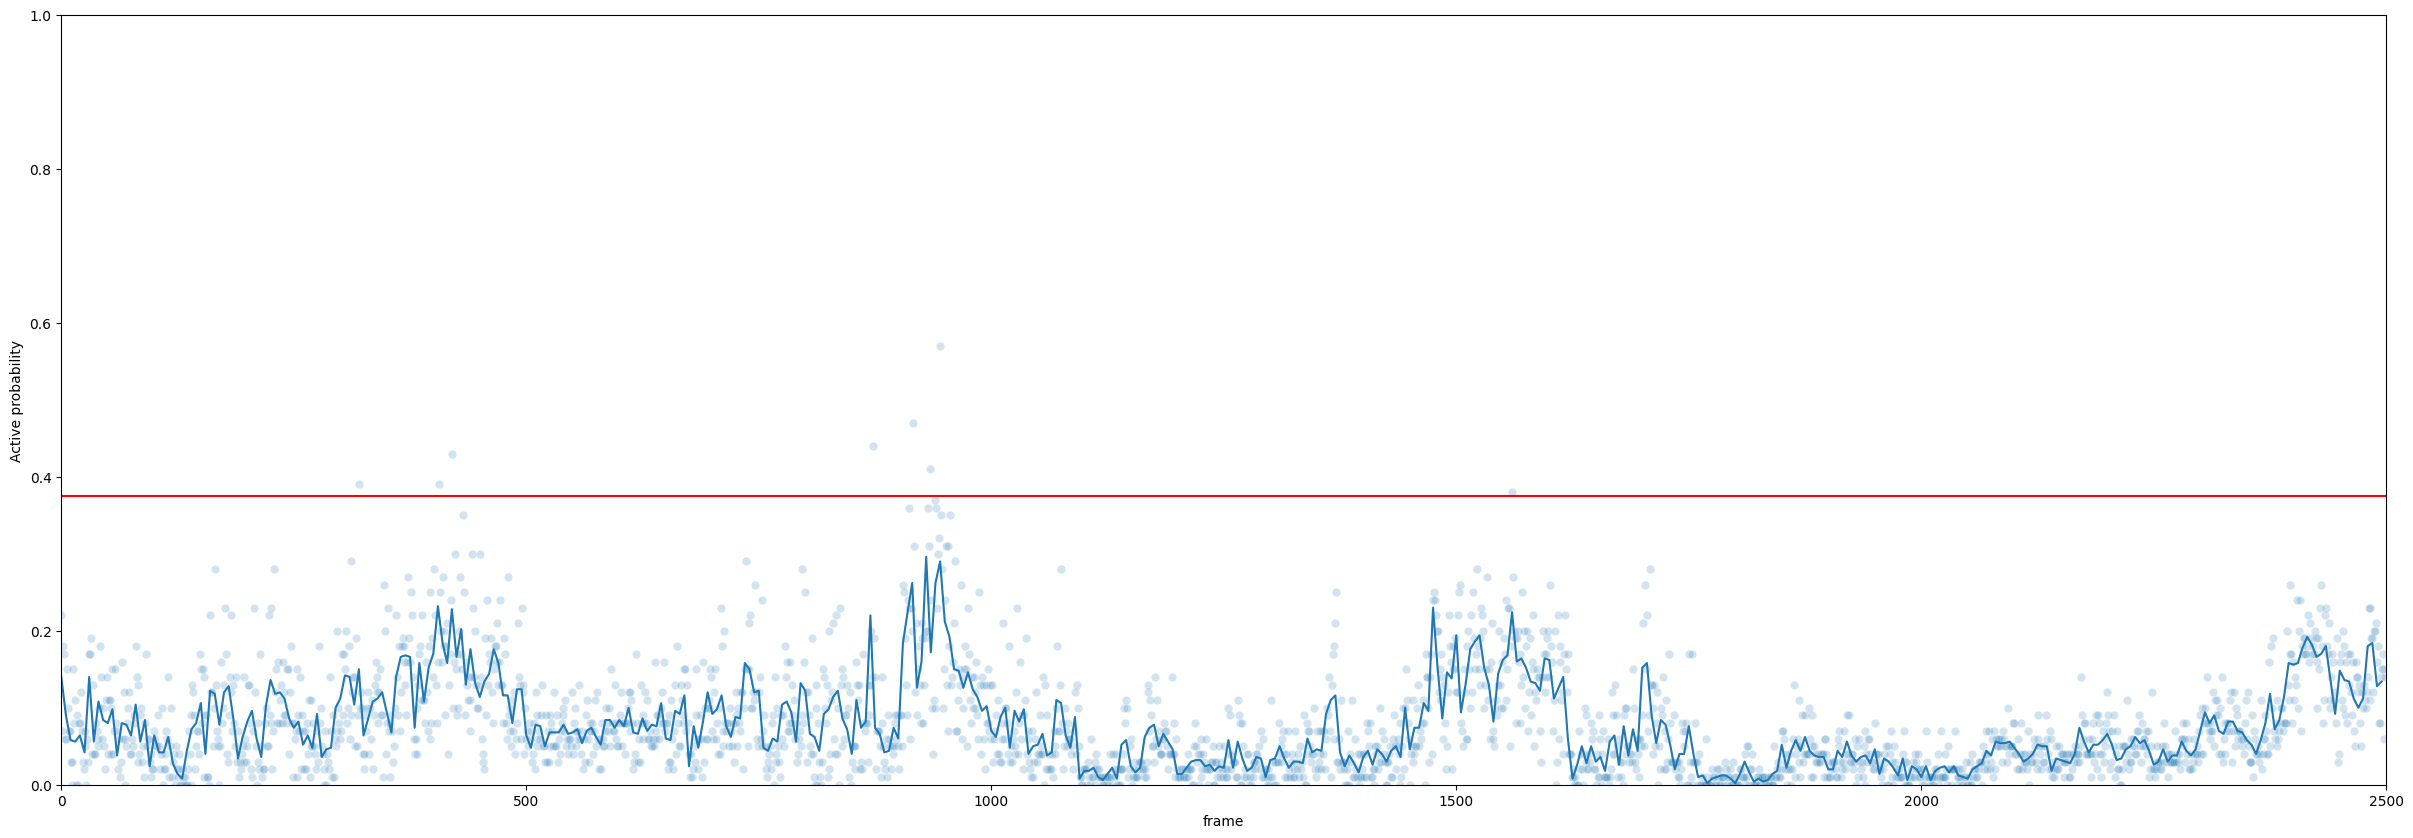

In [15]:
rv.traj_viz(pdb_id,
            pr.path_to_gpcrdb_files,
            dir_path, out_path,
            pr.gpcrdb_alignment, pr.gpcrdb_numeration, pr.one_mod_df,
            pr.bi_mod_df, pr.model, frames_dir_path, pr.inv_d,
            pr.res_contact_list, pr.one_mod_feat,
            pr.new_seq_aligned_to_GPCRdb_seq_database, pr.canonical_residues_dict,
            pr.his_types, pr.d)

The output graph in scatterplot format shows the actual APS values, the line plot shows smoothed values (five points to one). The red line represents the classification cutoff with APS = 0.375. If the trajectory is above this cutoff it is active, if bellow - inactive.